# Lesson 8 - Introduction to Unsupervised Learning

## Activity 1: Clustering with K-Means

1. Try to replace the number of clusters, standard deviation and  in K-means, observe what will happen and number of samples. Observe what will happen.

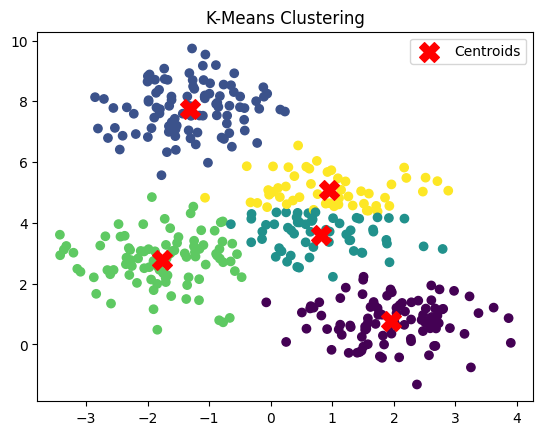

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create synthetic data   #from 300 to 400        #60 change to 80
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.80, random_state=0)

# Fit KMeans
kmeans = KMeans(n_clusters=5) # make it 5
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


## Activity 2: Principal Component Analysis (PCA)

2. Try to use a different dataset and practice using PCA.

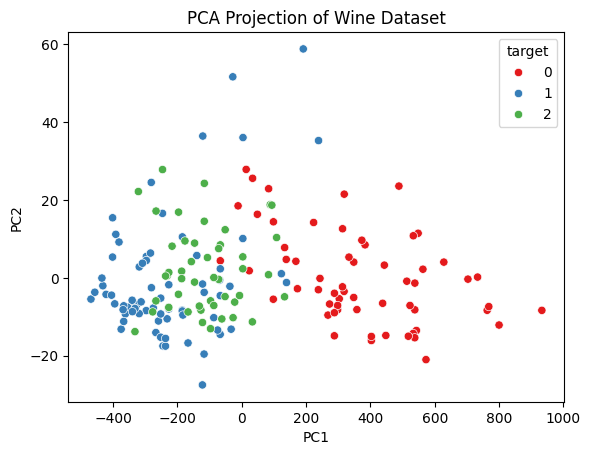

In [11]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot with labels
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['target'] = y
sns.scatterplot(data=df, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title("PCA Projection of Wine Dataset")
plt.show()

## Activity 3: Pattern Discovery in Unlabeled Data

From Activity 3, interpret the purpose of the activity in terms:

 A. Generation of  normal and outlier points (1-2 sentence)

 B. Fit Isolation Forest (1-2 sentences)

C. Visualization (3-5 sentences)


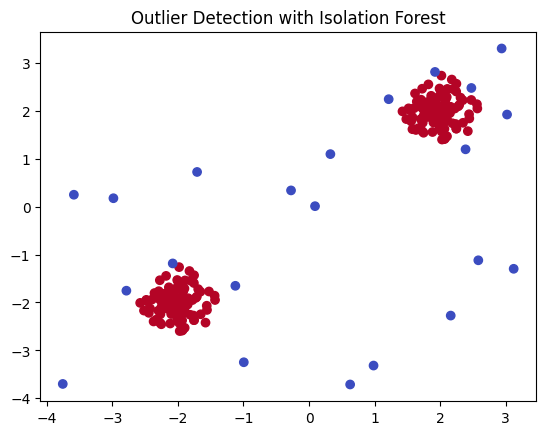

In [8]:
from sklearn.ensemble import IsolationForest

# Generate normal and outlier points
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_combined = np.r_[X + 2, X - 2, X_outliers]

# Fit Isolation Forest
clf = IsolationForest(contamination=0.1)
clf.fit(X_combined)
y_pred = clf.predict(X_combined)

# Visualize
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Outlier Detection with Isolation Forest")
plt.show()
